In [44]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [39]:
data = genfromtxt('/content/drive/MyDrive/AM/californiabin.csv', delimiter = ',')

In [40]:
X = data[:, :-1]
y = data[:, -1]

In [41]:
div = int(X.shape[0] * 0.8)
X_treino, X_teste = X[:div], X[div:-1]
y_treino, y_teste = y[:div], y[div:-1]

In [42]:
def normalize(X_treino, X_teste):

    Xmax = np.max(X_treino, axis = 0)
    Xmin = np.min(X_treino, axis = 0)

    X_treino_normalizado = (X_treino - Xmin)/(Xmax - Xmin)
    X_teste_normalizado = (X_teste - Xmin)/(Xmax - Xmin)

    return X_treino_normalizado, X_teste_normalizado

In [37]:
X_treino, X_teste = normalize(X_treino, X_teste)

In [43]:
# SVM com kernel RBF

svm = SVC(kernel='rbf')
param_grid_svm = {'C': [2**i for i in range(-5, 16, 2)],
                  'gamma': [2**i for i in range(-15, 4, 2)]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=10)
grid_search_svm.fit(X_treino, y_treino)

svm_best = grid_search_svm.best_estimator_
svm_best_params = grid_search_svm.best_params_

In [7]:
y_pred_svm = svm_best.predict(X_teste)
accuracy_svm = accuracy_score(y_teste, y_pred_svm)
recall_svm = recall_score(y_teste, y_pred_svm)
precision_svm = precision_score(y_teste, y_pred_svm)
f1_score_svm = f1_score(y_teste, y_pred_svm)

In [8]:
fpr_svm, tpr_svm, _ = roc_curve(y_teste, y_pred_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_teste, y_pred_svm)

In [45]:
# Random Forest

random_forest = RandomForestClassifier()
param_grid_rf = {'n_estimators': list(range(10, 201, 10)),
                 'max_depth': [4, 6, 8, 10, None]}

grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=10)
grid_search_rf.fit(X_treino, y_treino)

rf_best = grid_search_rf.best_estimator_
rf_best_params = grid_search_rf.best_params_

In [46]:
y_pred_rf = rf_best.predict(X_teste)
accuracy_rf = accuracy_score(y_teste, y_pred_rf)
recall_rf = recall_score(y_teste, y_pred_rf)
precision_rf = precision_score(y_teste, y_pred_rf)
f1_score_rf = f1_score(y_teste, y_pred_rf)

In [47]:
fpr_rf, tpr_rf, _ = roc_curve(y_teste, y_pred_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_teste, y_pred_rf)

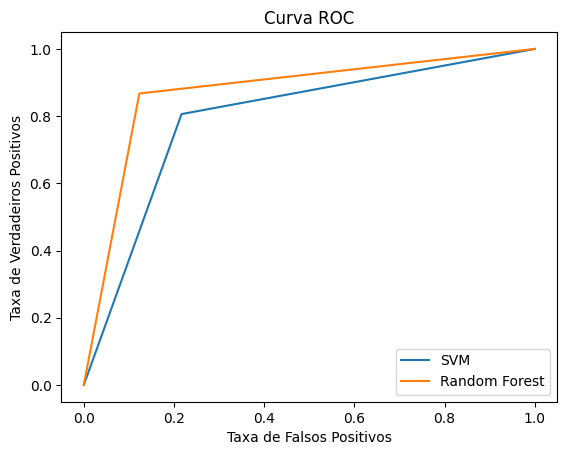

In [48]:
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

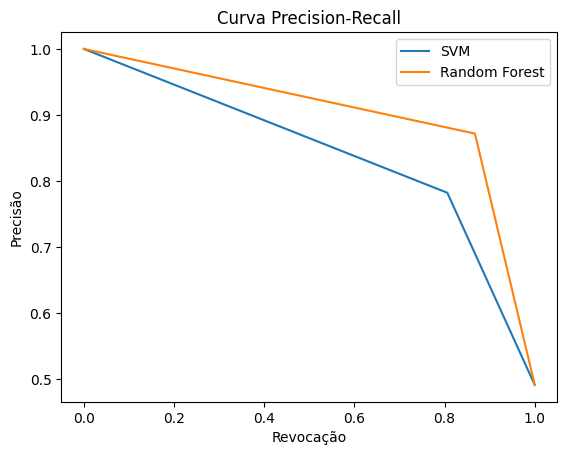

In [49]:
plt.plot(recall_svm, precision_svm, label='SVM')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

In [50]:
print("SVM - Melhores hiperparâmetros:")
print(svm_best_params)
print('\n')
print("Acurácia SVM: ", accuracy_svm)
print("Revocação SVM: ", recall_score(y_teste, y_pred_svm, average='binary'))
print("Precisão SVM: ", precision_score(y_teste, y_pred_svm, average='binary'))
print("F1-score SVM: ", f1_score(y_teste, y_pred_svm, average='binary'))

SVM - Melhores hiperparâmetros:
{'C': 32768, 'gamma': 3.0517578125e-05}


Acurácia SVM:  0.7944862155388471
Revocação SVM:  0.8061224489795918
Precisão SVM:  0.7821782178217822
F1-score SVM:  0.7939698492462313


In [52]:
print("Random Forest - Melhores hiperparâmetros:")
print(rf_best_params)
print("\n")
print("Acurácia RF: ", accuracy_rf)
print("Revocação RF: ", recall_score(y_teste, y_pred_rf, average='binary'))
print("Precisão RF: ", precision_score(y_teste, y_pred_rf, average='binary'))
print("F1-score RF: ", f1_score(y_teste, y_pred_rf, average='binary'))

Random Forest - Melhores hiperparâmetros:
{'max_depth': None, 'n_estimators': 80}


Acurácia RF:  0.8721804511278195
Revocação RF:  0.8673469387755102
Precisão RF:  0.8717948717948718
F1-score RF:  0.8695652173913043
